In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/test/OneDrive/Desktop/githubrepo/formula1-datasets/Formula1_2025Season_RaceResults.csv")
print("data berhasil di import")

data berhasil di import


# melihat stuktur data

In [4]:
print("Shape dataset : ", df.shape)
print("\n kolom yang tersedia : ")
print(df.columns.tolist())

Shape dataset :  (419, 11)

 kolom yang tersedia : 
['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time']


In [5]:
print("5 data pertama")
print(df.head(10))

5 data pertama
       Track Position  No           Driver                          Team  \
0  Australia        1   4     Lando Norris              McLaren Mercedes   
1  Australia        2   1   Max Verstappen    Red Bull Racing Honda RBPT   
2  Australia        3  63   George Russell                      Mercedes   
3  Australia        4  12   Kimi Antonelli                      Mercedes   
4  Australia        5  23  Alexander Albon             Williams Mercedes   
5  Australia        6  18     Lance Stroll  Aston Martin Aramco Mercedes   
6  Australia        7  27  Nico Hulkenberg           Kick Sauber Ferrari   
7  Australia        8  16  Charles Leclerc                       Ferrari   
8  Australia        9  81    Oscar Piastri              McLaren Mercedes   
9  Australia       10  44   Lewis Hamilton                       Ferrari   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:42:06.304      25             Yes         1

In [6]:
print("Info Dataset : ")
print(df.info())

Info Dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track             419 non-null    object
 1   Position          419 non-null    object
 2   No                419 non-null    int64 
 3   Driver            419 non-null    object
 4   Team              419 non-null    object
 5   Starting Grid     419 non-null    int64 
 6   Laps              419 non-null    int64 
 7   Time/Retired      419 non-null    object
 8   Points            419 non-null    int64 
 9   Set Fastest Lap   419 non-null    object
 10  Fastest Lap Time  405 non-null    object
dtypes: int64(4), object(7)
memory usage: 36.1+ KB
None


# Data cleaning mengguankan pANDAS

In [7]:
# cek missing value
print("Missing value per kolom :")
print(df.isnull().sum())

Missing value per kolom :
Track                0
Position             0
No                   0
Driver               0
Team                 0
Starting Grid        0
Laps                 0
Time/Retired         0
Points               0
Set Fastest Lap      0
Fastest Lap Time    14
dtype: int64


In [8]:
# handle missing values dan konversi ke tipe data
df['Points'] = pd.to_numeric(df['Points'], errors='coerce').fillna(0)
df['Position'] = pd.to_numeric(df['Position'], errors='coerce')
df['Starting Grid'] = pd.to_numeric(df['Starting Grid'], errors='coerce')
df['Laps'] = pd.to_numeric(df['Laps'], errors='coerce')
df['Finished'] = df['Position'].notna() & ~df['Time/Retired'].str.contains('DNS|DSQ|DNS' , na=False)

MEMBERSIHKAN DARA DNF/DNS/DSQ

In [9]:
print("status finish :")
print(df['Finished'].value_counts())
print(f"Finish rate: {(df['Finished'].sum() / len(df) * 100):.1f}%")


status finish :
Finished
True     371
False     48
Name: count, dtype: int64
Finish rate: 88.5%


SETELAH CLEANING


In [10]:
print("setelah cleaning ")
print(f"Total Records : {len(df):,}")
print(f"Races : {df['Track'].nunique()}")
print(f"Drivers: {df['Driver'].nunique()}")

setelah cleaning 
Total Records : 419
Races : 21
Drivers: 21


# ANALISIS DENGAN NUMPY - STATISTIKA DASAR

In [11]:
# MENGGUNAKAN NUMPT UNUK ANALISASIS STATISTIS

points_array = df['Points'].values
position_array = df['Position'].dropna().values

In [13]:
print(f"Statistik Point Semua Driver : {np.sum(points_array)}")
print(f"Rata-rata points per entry : {np.mean(points_array):.2f}")
print(f"std dev point : {np.std(points_array):.2f}")
print(f"Max point dalam satu race : {np.max(points_array)}")
print(f"Min points : {np.min(points_array)}")

Statistik Point Semua Driver : 2121
Rata-rata points per entry : 5.06
std dev point : 7.18
Max point dalam satu race : 25
Min points : 0


statistik poisis finish ( hanya yang finish )

In [151]:
print(f"rata rata posisi : {np.mean(position_array):.2f}")
print(f"median posisi : {np.median(position_array)}")
print(f"posisi terbaik : {np.min(position_array)}")
print(f"posisi terburuk : {np.max(position_array)}")

rata rata posisi : 9.40
median posisi : 9.0
posisi terbaik : 1.0
posisi terburuk : 20.0


# ANALISA DRIVER DENGAN PANDAS

In [152]:
driver_stats = df.groupby('Driver').agg({
    'Points': ['sum','mean','count'],
    'Position'  : ['mean','min','max'],
    'Finished': 'sum',
    'Set Fastest Lap' : lambda x : (x== 'Yes').sum()
}).round(2)

FLAYYEN COLUMNS NAMES

In [153]:
driver_stats.columns = ['Total_Points', 'Avg_points','Races','Avg_Position', 'Best_Position', 'Wors_Position', 'Finishes', 'Fastest_Laps']

HITUNG WIN RATE DAN PODIUM

In [154]:
wins = df[df['Position'] == 1].groupby('Driver').size()
podiums = df[df['Position'].between(1,3)].groupby('Driver').size()

driver_stats['Wins'] = wins
driver_stats['Podium'] = podiums
driver_stats['Win_Rate'] = (driver_stats['Wins'] / driver_stats['Races'] * 100).round(1)
driver_stats['Finish_Rate'] = (driver_stats['Finishes'] / driver_stats['Races'] *100).round(1)

FILE NaN untuk driver tanpa win/podium

In [155]:
driver_stats = driver_stats.fillna(0)

print("TOP 10 DRIVERS BY POINTS :")
print(driver_stats.nlargest(10, 'Total_Points')[['Total_Points', 'Wins', 'Podium', 'Avg_Position']])

TOP 10 DRIVERS BY POINTS :
                 Total_Points  Wins  Podium  Avg_Position
Driver                                                   
Lando Norris              367   7.0    17.0          3.62
Oscar Piastri             345   7.0    14.0          2.85
Max Verstappen            314   5.0    12.0          3.35
George Russell            253   2.0     8.0          4.57
Charles Leclerc           197   0.0     7.0          5.00
Lewis Hamilton            127   0.0     0.0          6.61
Kimi Antonelli            110   0.0     2.0          8.29
Alexander Albon            70   0.0     0.0          9.22
Nico Hulkenberg            43   0.0     1.0         11.78
Isack Hadjar               42   0.0     1.0         10.79


# analisis team dengan pandas

In [156]:

team_agg = df.groupby('Team').agg({
    'Points': ['sum', 'mean'],
    'Driver': 'nunique',
    'Position': 'mean',
    'Finished': 'sum',
    'Set Fastest Lap': lambda x: (x == 'Yes').sum() if 'Set Fastest Lap' in df.columns else 0,
    'Starting Grid': 'mean'
}).round(2)

In [157]:
team_agg.columns = ['_'.join(col).strip() for col in team_agg.columns.values]

HITUNG POINT PER DRIVER ( EFISIENSI TEAM )

In [158]:
team_analysis = team_agg.rename(columns={
    'Points_sum': 'Total_Points',
    'Points_mean': 'Avg_Points_Per_Entry',
    'Driver_nunique': 'Drivers',
    'Position_mean': 'Avg_Position',
    'Finished_sum': 'Finishes',
    'Set Fastest Lap_<lambda>': 'Fastest_Laps',
    'Starting Grid_mean': 'Avg_Grid'
})

In [159]:
team_analysis['Points_Per_Driver'] = (team_analysis['Total_Points'] / team_analysis['Drivers']).round(1)

HITUNG FINISH RATE

In [160]:
races_count = df['Track'].nunique()
team_analysis['Total_Entries'] = team_analysis['Drivers'] * races_count
team_analysis['Finish_Rate'] = (team_analysis['Finishes'] / team_analysis['Total_Entries'] * 100).round(1)

In [161]:
print("TEAM PERFORMANCE")
team_display = team_analysis[
    ['Total_Points','Points_Per_Driver','Avg_Position','Finish_Rate']
].sort_values('Total_Points', ascending=False)
print(team_display)

TEAM PERFORMANCE
                              Total_Points  Points_Per_Driver  Avg_Position  \
Team                                                                          
McLaren Mercedes                       702              351.0          3.20   
Mercedes                               363              181.5          6.24   
Red Bull Racing Honda RBPT             334              111.3          7.50   
Ferrari                                324              162.0          5.81   
Williams Mercedes                       99               49.5         10.29   
Racing Bulls Honda RBPT                 78               26.0         11.03   
Aston Martin Aramco Mercedes            65               32.5         12.25   
Haas Ferrari                            64               32.0         11.59   
Kick Sauber Ferrari                     62               31.0         12.60   
Alpine Renault                          20                6.7         14.47   
McLaren                            

# ANALISSIS RACE

In [162]:
race_stats = df.groupby('Track').agg({
    'Driver' : 'count',
    'Finished' : 'sum',
    'Points' : 'sum',
}).rename(columns={'Driver' :'Entries','Finished' :'Finishers'})

In [163]:
race_stats['Finish_Rate'] = (race_stats['Finishers'] / race_stats['Entries'] * 100).round(1)
print(race_stats)

                Entries  Finishers  Points  Finish_Rate
Track                                                  
Australia            20         14     101         70.0
Austria              20         16     101         80.0
Azerbaijan           20         19     101         95.0
Bahrain              20         18     101         90.0
Belgium              20         20     101        100.0
Brazil               20         17     101         85.0
Canada               20         18     101         90.0
China                20         16     101         80.0
Emilia-Romagna       20         18     101         90.0
Great Britain        20         15     101         75.0
Hungary              20         19     101         95.0
Italy                20         18     101         90.0
Japan                20         20     101        100.0
Mexico               20         17     101         85.0
Miami                20         16     101         80.0
Monaco               20         18     101      

In [164]:
print("Race Winner")
winner = df[df['Position']== 1][['Track','Driver','Team','Starting Grid']]
print(winner.to_string(index=False))


Race Winner
         Track         Driver                       Team  Starting Grid
     Australia   Lando Norris           McLaren Mercedes              1
         China  Oscar Piastri           McLaren Mercedes              1
         Japan Max Verstappen Red Bull Racing Honda RBPT              1
       Bahrain  Oscar Piastri           McLaren Mercedes              1
  Saudi Arabia  Oscar Piastri           McLaren Mercedes              2
         Miami  Oscar Piastri           McLaren Mercedes              4
Emilia-Romagna Max Verstappen Red Bull Racing Honda RBPT              2
        Monaco   Lando Norris           McLaren Mercedes              1
         Spain  Oscar Piastri           McLaren Mercedes              1
        Canada George Russell                   Mercedes              1
       Austria   Lando Norris           McLaren Mercedes              1
 Great Britain   Lando Norris           McLaren Mercedes              3
       Belgium  Oscar Piastri           McLaren Merc

VISUALISASI

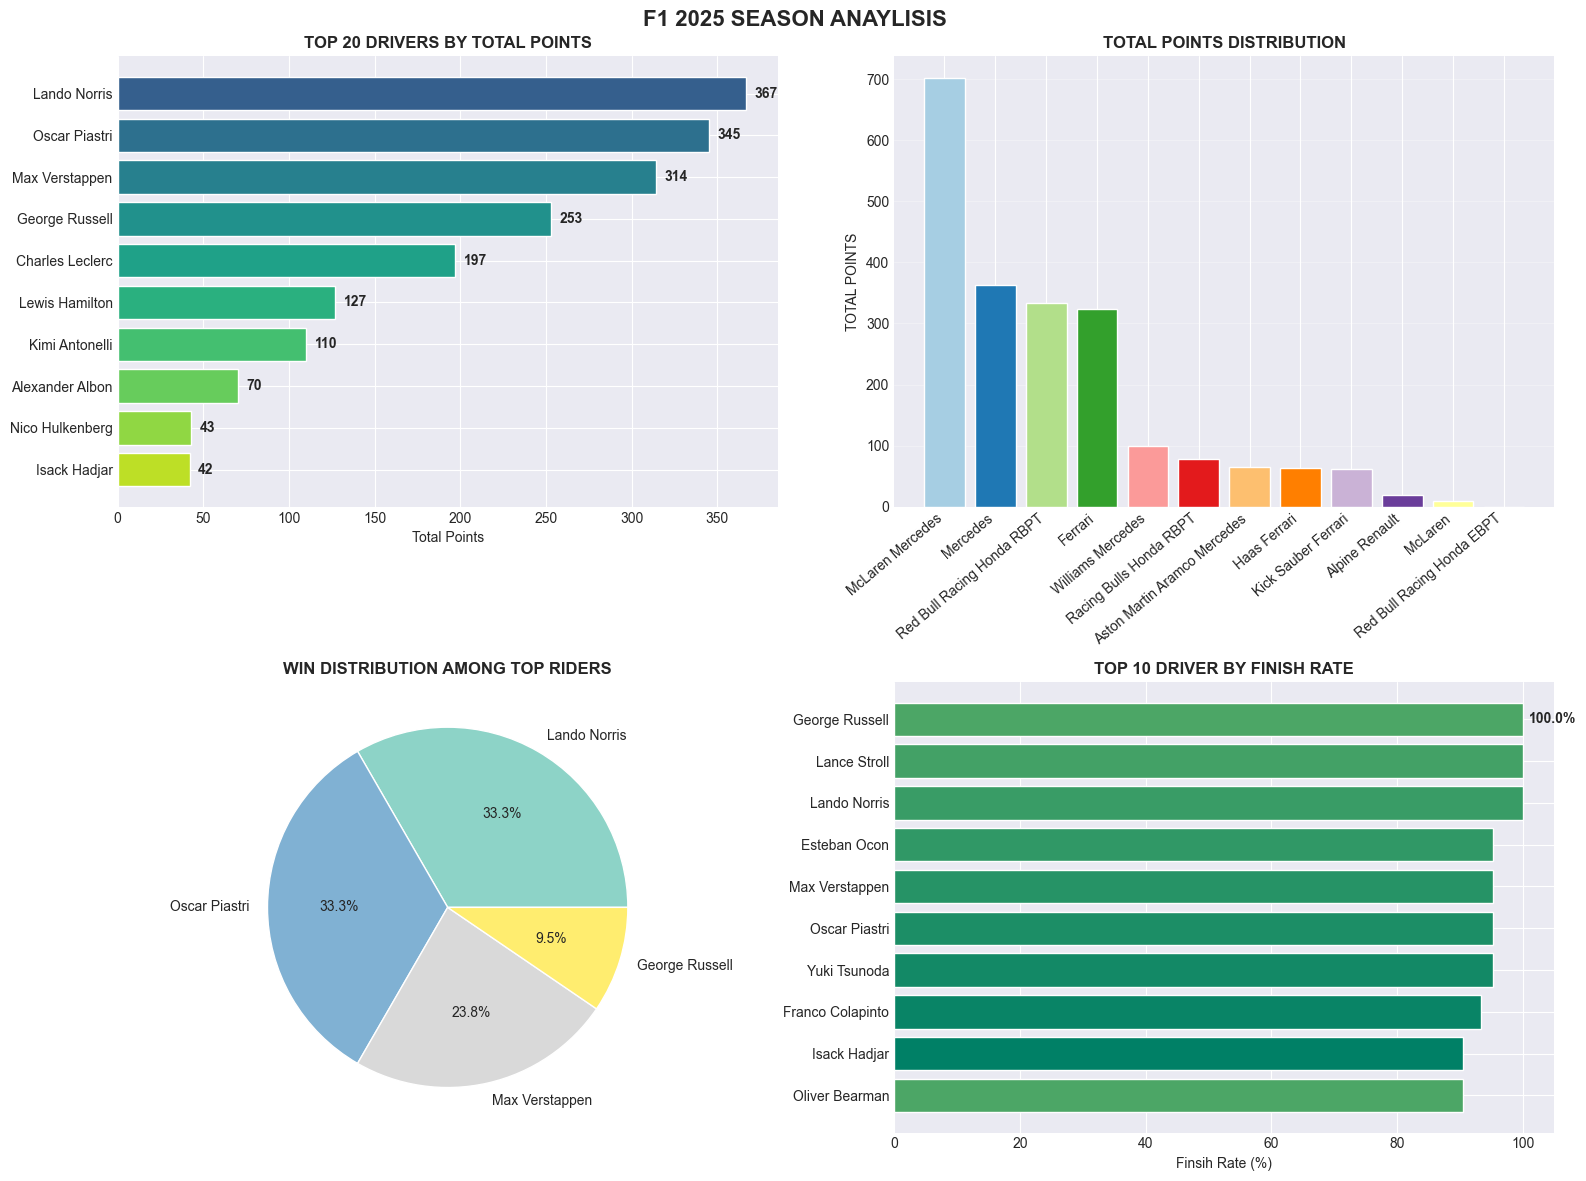

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [175]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('F1 2025 SEASON ANAYLISIS', fontsize=16, fontweight='bold')

# TOP DRIVER BY POINTS

top_driver = driver_stats.nlargest(10, 'Total_Points')
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_driver)))
axes[0,0].barh(range(len(top_driver)), top_driver['Total_Points'], color=colors)
axes[0,0].set_yticks(range(len(top_driver)))
axes[0,0].set_yticklabels(top_driver.index)
axes[0,0].set_title('TOP 20 DRIVERS BY TOTAL POINTS', fontweight='bold')
axes[0,0].set_xlabel('Total Points')
axes[0,0].invert_yaxis()
for i, v in enumerate(top_driver['Total_Points']):
    axes[0,0].text(v + 5 , i, str(int(v)), va='center', fontweight='bold')

# TEAM POINTS DISTRIBUTION
team_points = team_analysis.sort_values('Total_Points', ascending=False)
axes[0,1].bar(range(len(team_points)), team_points['Total_Points'], color=plt.cm.Paired(np.linspace(0, 1, len(team_points))))
axes[0,1].set_xticks(range(len(team_points)))
axes[0,1].set_xticklabels(team_points.index, rotation=40, ha='right')
axes[0,1].set_title('TOTAL POINTS DISTRIBUTION', fontweight='bold')
axes[0,1].set_ylabel('TOTAL POINTS')
axes[0,1].grid(axis='y', alpha=0.3)

# WINS DISTRIBUTION
top_winner = driver_stats[driver_stats['Wins'] > 0].nlargest(10, 'Wins')
if len(top_winner) > 0:
    color_pie = plt.cm.Set3(np.linspace(0, 1, len(top_winner)))
    axes[1,0].pie(top_winner['Wins'], labels=top_winner.index, autopct='%1.1f%%',colors=color_pie)
    axes[1,0].set_title('WIN DISTRIBUTION AMONG TOP RIDERS', fontweight='bold')
else:
    axes[1,0].text(0.5,0.5, 'NO WINS DATA AVAILABLE', ha='center', va='center', transform=axes[1,0].transAxes)

# FINISH RATE ANALYSIS
finish_rates = driver_stats.nlargest(10, 'Finish_Rate')
color_finish = plt.cm.summer(np.linspace(0.3, 0,9, len(finish_rates)))
axes[1,1].barh(range(len(finish_rates)), finish_rates['Finish_Rate'], color=color_finish)
axes[1,1].set_yticks(range(len(finish_rates)))
axes[1,1].set_yticklabels((finish_rates.index))
axes[1,1].set_title('TOP 10 DRIVER BY FINISH RATE', fontweight='bold')
axes[1,1].set_xlabel('Finsih Rate (%)')
axes[1,1].invert_yaxis()
for i, v in enumerate(finish_rates['Finish_Rate']):
    axes[1,1].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('f1_2025_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()